# Visualizing High Dimensional Data Using Dimensionality Reduction Techniques

Nowadays the data we collect are inherently high dimensional. This is due in part to the fact that sensors, data acquisition devices, data storage devices and data handling devices have become cheap. So we can effortlessly collect huge amounts of data. 

Data is called high dimensional if it has many features. To further clarify this point consider an example. We will consider an example related to machinery fault diagnosis. Let's suppose we are collecting vibration signal using an accelerometer. We can collect this time domain data for long durations of time. Then we can segment the data with each segment having a fixed, say 2048, data points. For each segment we can collect feature like 'Mean', 'Range', 'Variance', 'Skewness', etc. In vector form, each segment can be represented by a point whose components are feature values. So each data segment corresponds to a data points and if we have collected 10 features, our data is 10 dimensional. It is very easy to collect many more features including frequency domain and wavelet domain features. This can easily make our data very high dimensional.

The problem with high dimensional data is that we can't visualize it by plotting. The maximum dimensions that we can visualize is 3. If our data has more than three dimensions, we can't visualize all the dimensions at once. This also makes the analysis difficult. We have to come up with algorithms that does classification well in the higher dimensional data. 

Even though our data is high dimensional, usually a few of the dimensions are more important than others. So in essence, the high dimensional data resides in a lower dimensional subspace or on a manifold. Dimensionality reduction techniques helps us find those lower dimensional representations. 

While collecting data it is not known whether data resides on a subspace or on a manifold. So in advance it is not possible to predict which algorithm will work best for the type of data in consideration. Therefore, we need to apply different techniques to the data to get an idea of lower dimensional representation of data. 

In this post we will use Principal Component Analysis (PCA), Kernel Principal Component Analysis(KPCA), and  t-distributed Stochastic Neighbor Embedding (t-SNE) to obtain lower dimensional projections. Note that there are many different algorithms for dimensionality reduction. The three that we are considering are commonly used in practice. We will briefly touch upon some other techniques towards the end of the post. 

In this post we will use Case Western Reserve University dataset. We will take drive end data acquired at a sampling frequency of 48 kHz. The load on the shaft is 1 hp. For this load, there are 10 fault classes:

* C1  : Ball defect (0.007 inch)
* C2  : Ball defect (0.014 inch)
* C3  : Ball defect (0.021 inch)
* C4  : Inner race fault (0.007 inch)
* C5  : Inner race fault (0.014 inch)
* C6  : Inner race fault (0.021 inch)
* C7  : Normal
* C8  : Outer race fault (0.007 inch, data collected from 6 O'clock position)
* C9  : Outer race fault (0.014 inch, 6 O'clock)
* C10 : Outer race fault (0.021 inch, 6 O'clock)

For each fault type, we have collected time domain signal and obtained wavelet packet energy features. To get an overview of procedure to calculate this feature, refer this [link](https://github.com/biswajitsahoo1111/cbm_codes_open/blob/master/notebooks/SVM_wavelet_energy_multiclass_cwru.pdf).

Readers can download the data file containing extracted features from [here](https://github.com/biswajitsahoo1111/cbm_codes_open/blob/master/data/feature_matrix_wav_energy8_48k_2048_load_1.csv). For each fault type, there are 200 data points and 8 wavelet packet energy features have been calculated. The size of feature matrix is $(2000\times 9)$. The last column contains fault type.

Note that this data is only 8 dimensional and by definition this is not very high dimensional data. But the procedures we discuss will also apply to higher dimensional data. In this case we will see that the techniques reveal hidden representations that is not obvious from the original data. 

We will not discuss the theory behind each method. Rather, we will just implement the methods. To know more about the theory of each method, readers can refer many excellent sources that are there in internet.


In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE

In [2]:
data = pd.read_csv('D:/rfiles/feature_matrix/48k/feature_matrix_wav_energy8_48k_2048_load_1.csv') 
# Change the above line to point to the folder where you have downloaded the data
scaled_data = sklearn.preprocessing.scale(data.iloc[:,0:7])

In [3]:
category_labels = ['Ball 0.007 inch', 'Ball 0.014 inch', 'Ball 0.021 inch', 
                  'Inner race 0.007 inch', 'Inner race 0.014 inch', 'Inner race 0.021 inch', 'Normal',
                  'Outer race 0.007 inch', 'Outer race 0.014 inch', 'Outer race 0.021 inch']
fault_type = pd.Categorical(data['fault']).rename_categories(category_labels)

## PCA
A brief theory and implementation of PCA can be found [here](https://biswajitsahoo1111.github.io/post/principal-component-analysis-part-i/).

Text(0.5, 1.0, 'Result of PCA without data scaling')

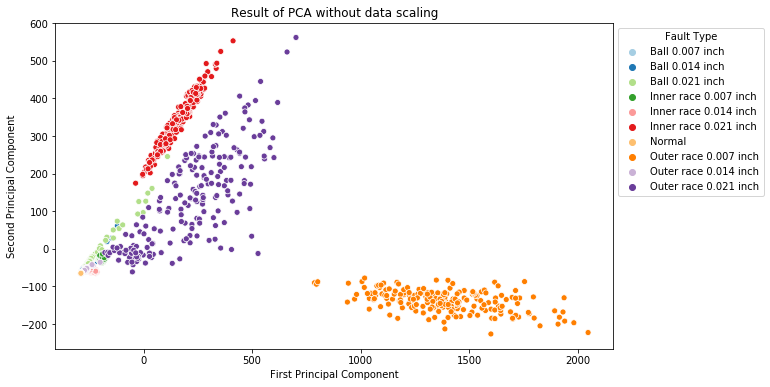

In [4]:
pca_res = sklearn.decomposition.PCA(n_components= 2, random_state= 1).fit_transform(data.iloc[:,0:7])

plt.figure(figsize=(10,6))
sns.scatterplot(
        x=pca_res[:,0], y= pca_res[:,1],
        hue=fault_type,
        palette=sns.color_palette("Paired",10),
        data=pd.DataFrame(pca_res))
plt.legend(bbox_to_anchor=(1, 1), loc=2, title = "Fault Type")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("Result of PCA without data scaling")

Projection using normal PCA doesn't segregate different classes. Sometimes by scaling the data before applying PCA gives better results. Let's try that next. 

Text(0.5, 1.0, 'Result of PCA after data scaling')

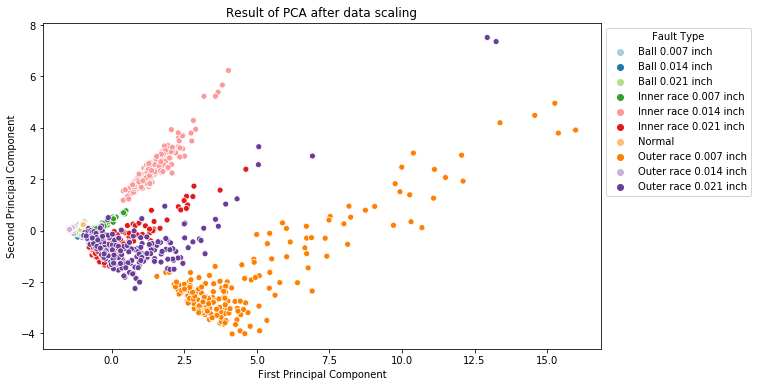

In [5]:
pca_scaled_res = sklearn.decomposition.PCA(n_components=2, random_state = 2).fit_transform(scaled_data)
plt.figure(figsize=(10,6))
sns.scatterplot(
        x=pca_scaled_res[:,0], y= pca_scaled_res[:,1],
        hue=fault_type,
        palette=sns.color_palette("Paired",10),
        data=pd.DataFrame(pca_scaled_res))
plt.legend(bbox_to_anchor=(1, 1), loc=2, title = "Fault Type")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("Result of PCA after data scaling")

This doesn't improve anything. So linear dimensionality reduction techniques are not that good at segregating this type of fault. Next we can apply nonlinear dimensionality reduction technique to see if the situation improves. We will apply Kernel PCA to this data.

## Kernel PCA

Text(0.5, 1.0, 'Result of KPCA on scaled data')

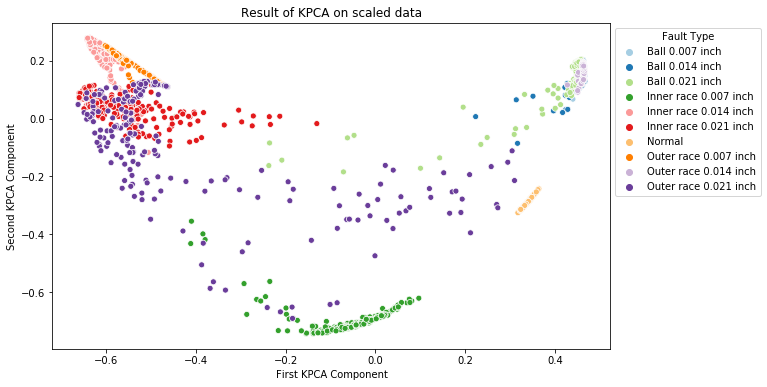

In [6]:
ker_pca_res = sklearn.decomposition.KernelPCA(n_components=2,kernel="rbf",gamma = 0.5,random_state=3).fit_transform(scaled_data)

plt.figure(figsize=(10,6))
sns.scatterplot(
        x=ker_pca_res[:,0], y= ker_pca_res[:,1],
        hue=fault_type,
        palette=sns.color_palette("Paired",10),
        data=pd.DataFrame(ker_pca_res))
plt.legend(bbox_to_anchor=(1, 1), loc=2, title = "Fault Type")
plt.xlabel("First KPCA Component")
plt.ylabel("Second KPCA Component")
plt.title("Result of KPCA on scaled data")

This result is slightly better than previous ones but still doesn't separate the data convincingly. So perhaps the data lies on a manifold. So now we will use the t-distributed stochastic neighbor embedding (t-SNE) to segregate it. 

## t-SNE

Text(0.5, 1.0, 'Result of t-SNE on scaled data')

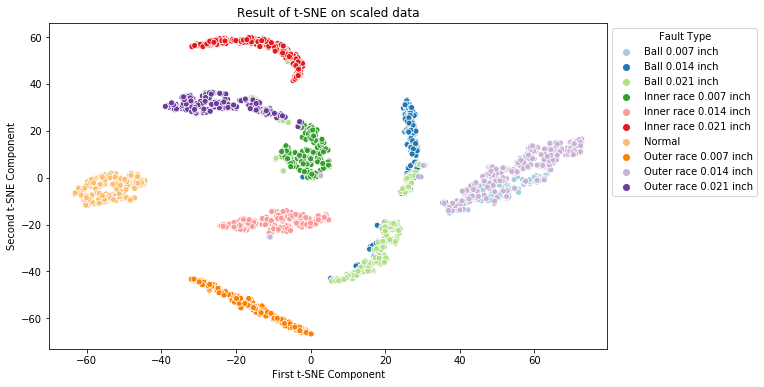

In [7]:
tsne_res = TSNE(n_components=2,random_state=4).fit_transform(data.iloc[:,0:7])
plt.figure(figsize=(10,6))
sns.scatterplot(
        x=tsne_res[:,0], y= tsne_res[:,1],
        hue=fault_type,
        palette=sns.color_palette("Paired",10),
        data=pd.DataFrame(tsne_res))
plt.legend(bbox_to_anchor=(1, 1), loc=2, title = "Fault Type")
plt.xlabel("First t-SNE Component")
plt.ylabel("Second t-SNE Component")
plt.title("Result of t-SNE on scaled data")

t-SNE gives much better result as compared to other techniques. Note that results of t-SNE might slightly vary from iteration to iteration. There is no inbuilt way to set seed for this as in python. So while in python every time we get the same answer, in R answers will vary slightly.

Also note that 0.007 inch ball defect and 0.014 inch outer race defect faults are over each other. This makes classification of these two fault types difficult. This is in agreement with the results that we have obtained in previous posts using SVM.

Until now, we have used three most commonly used techniques for dimensionality reduction. But these three are not the only techniques out there. There are many different techniques for dimensionality reduction. Multidimensional scaling (MDS), Isomap, Locally Linear Embedding (LLE) are a few among those. The results of those are not as convincing as the above three. So we have not included those here. But curious readers are encouraged to apply those techniques. It can be easily implemented using 'Scikit-learn' as the commands are similar to those disscussed above.

Last modified: 7$^{th}$ June, 2019